#  Car Price Prediction Project

##  Date of Data Collection
The dataset was collected on **04/04/2025** from **[Otomoto.pl](https://www.otomoto.pl/)** — one of the largest online car marketplaces in Poland. The data includes various attributes related to used cars such as brand, model, production year, mileage, fuel type, engine size, horsepower, color, transmission type, and price.

##  Project Objective
The main goal of this project is to build an intelligent system that can **accurately predict the price of a car** based on its technical and visual specifications. This can help buyers and sellers estimate a fair market price and make more informed decisions.

##  Author
**Viktor Kulyk**
---



In this section, we will load and clean the raw data scraped from [Otomoto.pl](https://www.otomoto.pl/).
###  Key Tasks:
- Load the dataset
- Insect data types and missing values
- Clean and convert string-based numeric columns
- Prepare a clean version of the dataset for analysis

---

##  Initial Dataset Overview

Let's load the data and look at the structure, column names, data types, and basic statistics.

In [1]:
import pandas as pd

#  Load the dataset
df = pd.read_csv("data.csv")  # Replace with correct path if needed

#  Basic overview
print(" Dataset shape:", df.shape)
print("\n Column names:", df.columns.tolist())
print("\n Sample rows:")
display(df.head())

#  Data types and non-null counts
print("\ Dataset Info:")
df.info()

#  Check for missing values
print("\n Missing Values:")
print(df.isnull().sum().sum)

 Dataset shape: (3743, 12)

 Column names: ['Brand', 'Model', 'Year', 'Mileage', 'Fuel Type', 'Transmission', 'Engine Size', 'Horsepower', 'Color', 'Price', 'Description', 'URL']

 Sample rows:


,Brand,Model,Year,Mileage,Fuel Type,Transmission,Engine Size,Horsepower,Color,Price,Description,URL
0,Ford,Ranger,2024.0,1 km,Diesel,Automatyczna,2 993 cm3,1 km,Szary,"307498,77",Superauto.pl to rewolucja na polskim rynku mot...,https://www.otomoto.pl/osobowe/oferta/ford-ran...
1,Honda,CR-V,2012.0,169 000 km,Benzyna,Manualna,1 997 cm3,169 000 km,Biały,55800,"Szanowni PaństwoMiło nam poinformować, że dołą...",https://www.otomoto.pl/osobowe/oferta/honda-cr...
2,Volvo,XC 60,2022.0,100 000 km,Diesel,Automatyczna,1 969 cm3,100 000 km,Szary,161800,! ! ! NAJŁADNIEJSZA WERSJA R-DESIGN + KOŁA 21'...,https://www.otomoto.pl/osobowe/oferta/volvo-xc...
3,Ford,Focus,2025.0,1 km,Hybryda,Automatyczna,999 cm3,1 km,Niebieski,102500,OFEROWANY SAMOCHÓD:- Ford Focus- Silnik: 999- ...,https://www.otomoto.pl/osobowe/oferta/ford-foc...
4,BMW,Seria 1,2017.0,119 751 km,Benzyna,Automatyczna,1 499 cm3,119 751 km,Czerwony,62900,BMW 118i M SportSilnik: Turbo benzyna 1.5 o mo...,https://www.otomoto.pl/osobowe/oferta/bmw-seri...


\ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3743 non-null   object 
 1   Model         3743 non-null   object 
 2   Year          3743 non-null   float64
 3   Mileage       3743 non-null   object 
 4   Fuel Type     3743 non-null   object 
 5   Transmission  3743 non-null   object 
 6   Engine Size   3743 non-null   object 
 7   Horsepower    3743 non-null   object 
 8   Color         3743 non-null   object 
 9   Price         3743 non-null   object 
 10  Description   3743 non-null   object 
 11  URL           3743 non-null   object 
dtypes: float64(1), object(11)
memory usage: 351.0+ KB

 Missing Values:
<bound method Series.sum of Brand           0
Model           0
Year            0
Mileage         0
Fuel Type       0
Transmission    0
Engine Size     0
Horsepower      0
Color           0
Price       

## Data Summary & Collection Method

### Dataset Overview
The dataset contains **3,743 rows** and **12 columns**, each representing a different aspect of a car listing:

- **Brand / Model / Year / Mileage / Engine Size / Horsepower** — key technical specifications
- **Fuel Type / Transmission / Color** — categorical features
- **Price** — target variable
- **Description / URL** — unstructured data and link to the original listing

There are **no missing values**, which simplifies preprocessing. However, multiple columns (`Mileage`, `Engine Size`, `Horsepower`, and `Price`) are stored as strings and include non-numeric characters such as `"km"`, `"cm3"`, and `","`. These will need to be cleaned and converted to numeric types.

The `Year` column is stored as a float, though it should be treated as an integer.

---

### Data Collection Process

The dataset was scraped from **[Otomoto.pl](https://www.otomoto.pl/)** on **03/05/2025**. Initially, I used standard scraping libraries such as:

- `requests` and `httpx` for making HTTP calls
- `BeautifulSoup (bs4)` for parsing the HTML structure

However, Otomoto actively blocks automated bots, leading to incomplete data collection. To overcome this, I switched to **Selenium** running in **headless mode** with **stealth configurations** (using `selenium-stealth`) to mimic real user behavior and bypass anti-bot protections.

This hybrid approach allowed me to successfully scrape thousands of car listings, preserving detailed car attributes from individual offer pages.

---

In the next step, we will clean and preprocess the raw data to make it suitable for analysis and modeling.

## Why These Features?

When predicting the price of a used car, it’s essential to collect features that are most relevant to **vehicle condition**, **market perception**, and **technical specifications**. The following attributes were selected based on their strong influence on car value:

### Selected Features and Their Rationale:

- **Brand**: The manufacturer significantly affects resale value. Premium brands like BMW or Audi typically hold higher value over time.

- **Model**: Different models within a brand vary in popularity and pricing. For example, a BMW X5 is priced very differently than a BMW 1 Series.

- **Year**: Newer cars generally have higher prices. The year indicates the car’s age, which directly impacts depreciation.

- **Mileage**: One of the most important indicators of vehicle wear and tear. Lower mileage usually results in a higher price.

- **Fuel Type**: Cars with different fuel types (Petrol, Diesel, Hybrid, Electric) have different price ranges due to efficiency, maintenance costs, and environmental impact.

- **Transmission**: Automatic cars are often priced higher due to convenience and increased demand.

- **Engine Size**: Indicates engine capacity. Larger engines are usually more powerful but less fuel-efficient, which affects market value.

- **Horsepower**: Reflects engine performance. Cars with higher horsepower tend to be more expensive.

- **Color**: While subjective, car color can influence resale price. Neutral colors like black, white, and gray are generally more desirable.

- **Price**: This is the **target variable** — the value we aim to predict.

- **Description & URL**: Although not used directly in modeling, the description provides textual data that can be analyzed in future NLP projects, and the URL links back to the original listing.

---

These features were chosen to strike a balance between **predictive power**, **availability on Otomoto**, and **relevance to real-world buyers and sellers**.

## Data Cleaning

The dataset contains several columns that should be numeric but are stored as strings with non-numeric characters (e.g., `"km"`, `"cm3"`, commas). In this section, we will:

- Convert `Mileage` from `"169 000 km"` → `169000`
- Convert `Engine Size` from `"2 993 cm3"` → `2993`
- Fix `Horsepower` values (currently incorrect due to a data extraction bug)
- Convert `Price` from `"102500"` or `"307498,77"` → `float`
- Cast `Year` from `float` to `int`
- Drop `Description` and `URL` as they are not used in modeling


In [2]:
def clean_numeric_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Clean Mileage
    df["Mileage"] = df["Mileage"].str.replace(" km", "", regex=False).str.replace(" ", "")
    df["Mileage"] = pd.to_numeric(df["Mileage"], errors="coerce")

    # Clean Engine Size
    df["Engine Size"] = df["Engine Size"].str.replace(" cm3", "", regex=False).str.replace(" ", "")
    df["Engine Size"] = pd.to_numeric(df["Engine Size"], errors="coerce")

    # Clean Horsepower (extract digits)
    df["Horsepower"] = df["Horsepower"].str.extract(r"(\d+)", expand=False)
    df["Horsepower"] = pd.to_numeric(df["Horsepower"], errors="coerce")

    # Clean Price
    df["Price"] = df["Price"].str.replace(",", ".", regex=False).str.replace(" ", "")
    df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

    # Convert Year to int
    df["Year"] = df["Year"].astype(int)

    # Drop unused columns
    df.drop(columns=["Description", "URL"], inplace=True)

    return df
df = clean_numeric_features(df)

In [3]:
#  Check unique values for each categorical feature
categorical_columns = ["Brand", "Fuel Type", "Transmission", "Color"]

for col in categorical_columns:
    print(f" {col} — Unique values: {df[col].nunique()}")
    print(df[col].unique())
    print("\n" + "-" * 50 + "\n")


 Brand — Unique values: 54
['Ford' 'Honda' 'Volvo' 'BMW' 'Cupra' 'Opel' 'Peugeot' 'Porsche' 'Audi'
 'Toyota' 'Fiat' 'Mercedes-Benz' 'Skoda' 'Seat' 'Kia' 'Land Rover'
 'Renault' 'Nissan' 'Volkswagen' 'MINI' 'Hyundai' 'Mazda' 'Jeep' 'RAM'
 'Alfa Romeo' 'Suzuki' 'MG' 'Chevrolet' 'Citroën' 'Subaru' 'Lexus'
 'SsangYong/KGM' 'Abarth' 'Baic' 'Mitsubishi' 'Aston Martin' 'Dacia'
 'DFSK' 'Infiniti' 'Maserati' 'Omoda' 'Jaguar' 'Jaecoo' 'Chrysler' 'Dodge'
 'Isuzu' 'Saab' 'Smart' 'BYD' 'DS Automobiles' 'GMC' 'Bentley' 'Buick'
 'Forthing']

--------------------------------------------------

 Fuel Type — Unique values: 5
['Diesel' 'Benzyna' 'Hybryda' 'Hybryda Plug-in' 'Benzyna+LPG']

--------------------------------------------------

 Transmission — Unique values: 2
['Automatyczna' 'Manualna']

--------------------------------------------------

 Color — Unique values: 17
['Szary' 'Biały' 'Niebieski' 'Czerwony' 'Srebrny' 'Brązowy' 'Czarny'
 'Granatowy' 'Beżowy' 'Zielony' 'Złoty' 'Pomarańczowy' 'Inn

In [4]:
unique_models = df["Model"].unique()
print(f" Unique Models ({len(unique_models)}):")
print(unique_models)

 Unique Models (466):
['Ranger' 'CR-V' 'XC 60' 'Focus' 'Seria 1' 'Formentor' 'Mokka' '5008'
 'Seria 3' 'Cayenne' 'A5' 'Land Cruiser' 'Astra' 'Bravo' 'Proace Verso'
 'Klasa E' 'Q5' 'Kamiq' 'GLC' 'Ateca' 'Optima' 'Range Rover Sport'
 'Kangoo' 'Qashqai' 'Passat' '2008' 'Countryman' 'Kodiaq' 'Seria 2'
 'Tucson' 'X6' 'CX-3' 'Q7' 'A7' 'S5' 'Karoq' 'Sportage' 'Combo' 'Compass'
 '1500' 'A3' 'Golf Plus' 'Giulia' 'Touran' 'X7' 'S-Max' 'Superb' 'A6'
 'ix35' 'Elantra' 'Q3' 'Octavia' 'Vitara' 'SQ7' 'Klasa V' '500X' 'V90'
 'Mondeo' 'CLA' 'X3 M' 'Scala' 'HS' '3008' 'Kuga' 'Discovery' 'Captiva'
 'Corolla' 'Arteon' 'Arkana' 'Espace' 'Kadjar' '308' 'S8' 'A8' 'Tayron'
 'RS7' 'Golf' 'EcoSport' 'Tiguan' 'Transporter' 'CLS' 'X5' 'X5 M' 'i40'
 'Ceed' 'C3' 'Kona' 'Fabia' 'Avenger' 'Range Rover' 'Leon' 'Camaro'
 'Klasa C' 'Cherokee' 'HR-V' 'X1' 'Altea XL' 'CX-5' 'Range Rover Velar'
 '3' 'i10' 'Seria 5' 'RAV4' 'V50' 'Outback' 'i30' 'Yaris' 'NX' 'Klasa A'
 'Insignia' 'Panamera' 'RAPID' 'M3' 'Corolla Cross' 'A4' 

### Cleaning & Translating Categorical Features

Several categorical columns in the dataset were written in Polish, which may not be suitable for international model deployment or sharing on GitHub. For consistency and better readability, we translated key categorical values into English.

#### Translations applied:

- **Fuel Type**:
  - `"Benzyna"` → `"Petrol"`
  - `"Diesel"` → `"Diesel"`
  - `"Hybryda"` → `"Hybrid"`
  - `"Hybryda Plug-in"` → `"Hybrid Plug-in"`
  - `"Benzyna+LPG"` → `"Petrol+LPG"`

- **Transmission**:
  - `"Automatyczna"` → `"Automatic"`
  - `"Manualna"` → `"Manual"`

- **Color**:
  Translated all car colors from Polish to English:
  - `"Szary"` → `"Gray"`
  - `"Biały"` → `"White"`
  - `"Czarny"` → `"Black"`
  - `"Niebieski"` → `"Blue"`
  - `"Czerwony"` → `"Red"`
  - `"Srebrny"` → `"Silver"`
  - `"Brązowy"` → `"Brown"`
  - `"Granatowy"` → `"Navy"`
  - `"Beżowy"` → `"Beige"`
  - `"Zielony"` → `"Green"`
  - `"Złoty"` → `"Gold"`
  - `"Pomarańczowy"` → `"Orange"`
  - `"Błękitny"` → `"Light Blue"`
  - `"Bordowy"` → `"Burgundy"`
  - `"Żółty"` → `"Yellow"`
  - `"Fioletowy"` → `"Purple"`
  - `"Inny kolor"` → `"Other"`

This step ensures that all features are **uniform, interpretable**, and ready for encoding in the next stage of data preparation.


In [5]:
def translate_polish_categories(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Translate Fuel Type
    df["Fuel Type"] = df["Fuel Type"].replace({
        "Benzyna": "Petrol",
        "Diesel": "Diesel",
        "Hybryda": "Hybrid",
        "Hybryda Plug-in": "Hybrid Plug-in",
        "Benzyna+LPG": "Petrol+LPG"
    })

    # Translate Transmission
    df["Transmission"] = df["Transmission"].replace({
        "Automatyczna": "Automatic",
        "Manualna": "Manual"
    })

    # Translate Color
    color_translation = {
        "Szary": "Gray",
        "Biały": "White",
        "Czarny": "Black",
        "Niebieski": "Blue",
        "Srebrny": "Silver",
        "Brązowy": "Brown",
        "Czerwony": "Red",
        "Granatowy": "Navy",
        "Beżowy": "Beige",
        "Zielony": "Green",
        "Złoty": "Gold",
        "Pomarańczowy": "Orange",
        "Inny kolor": "Other",
        "Błękitny": "Light Blue",
        "Bordowy": "Burgundy",
        "Żółty": "Yellow",
        "Fioletowy": "Purple"
    }
    df["Color"] = df["Color"].replace(color_translation)

    return df
df = translate_polish_categories(df)


### Boolean Conversion: Transmission → IsAutomatic

The original `Transmission` column contained two categorical values: `"Automatic"` and `"Manual"`. Since this feature is binary and does not require complex encoding, we converted it into a boolean format:

- `"Automatic"` → `1`
- `"Manual"` → `0`

This new column is called `IsAutomatic`.

#### Benefits:
- Reduces feature dimensionality
- Simplifies the dataset
- Improves performance for linear and deep learning models
- Retains full interpretability

The original `Transmission` column was dropped after the transformation.


In [6]:
def convert_transmission_to_bool(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # Convert transmission to boolean: 1 = Automatic, 0 = Manual
    df["IsAutomatic"] = df["Transmission"].map({"Automatic": 1, "Manual": 0})

    # Drop the original column
    df.drop(columns=["Transmission"], inplace=True)

    return df
df = convert_transmission_to_bool(df)


###  Simplifying Color Feature

The original `Color` column contained over 15 unique values. Since car color typically has only a minor impact on price, we grouped it into **three general categories**:

- **Dark**: Black, Gray, Navy, Burgundy, Brown, Purple  
- **Light**: White, Silver, Beige, Light Blue, Yellow, Gold  
- **Other**: Red, Blue, Green, Orange, and uncommon colors

This simplification reduces noise and dimensionality without sacrificing predictive power. The new column is called `ColorGroup`. The original `Color` column was removed.

In [7]:

def group_color_feature(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # Define color groups
    dark_colors = ["Black", "Gray", "Navy", "Burgundy", "Brown", "Purple"]
    light_colors = ["White", "Silver", "Beige", "Light Blue", "Yellow", "Gold"]

    def classify_color(color):
        if color in dark_colors:
            return "Dark"
        elif color in light_colors:
            return "Light"
        else:
            return "Other"

    # Apply grouping
    df["ColorGroup"] = df["Color"].apply(classify_color)

    # Drop original color column
    df.drop(columns=["Color"], inplace=True)

    return df
df = group_color_feature(df)


### Exploring Year Distribution

Before moving forward, it's important to understand the distribution of the `Year` feature — which represents the car's production year. This can help identify:

- Outliers (very old cars that may skew model performance)
- Distribution shape (most common car years)
- Whether we need to filter or bin values

In this step, we list all unique years and count how many distinct values exist.


In [8]:
unique_models = df["Year"].unique()
print(f" Unique Models ({len(unique_models)}):")
print(unique_models)

 Unique Models (36):
[2024 2012 2022 2025 2017 2015 2019 2016 2014 2010 2011 2021 2020 2005
 2018 2003 2023 2013 2004 2007 2006 2008 2009 2001 1983 1999 2002 1993
 1991 2000 1989 1965 1994 1995 1998 1966]


In [9]:
print(df["Year"].dtype)


int32


### ✅ Observations:

- The dataset contains **36 unique years**, ranging from **1965 to 2025**.
- Most years are from the 2000s and 2010s, which is expected for the used car market.
- A few very old values (e.g., `1965`, `1966`, `1983`, `1989`) might be **outliers** or **collector cars**.
- Depending on their frequency, we might:
  - Keep them (if they are relevant)
  - Group them into a single category like `"Before 1990"`
  - Drop them to reduce noise

We’ll explore this further during EDA with plots and frequency counts.

### Correlation Matrix

To explore relationships between numerical features, we compute the Pearson correlation matrix. This helps identify:

- Strong correlations between features and the target (`Price`)
- Potential multicollinearity between independent variables
- Opportunities for dimensionality reduction

Below is the heatmap of correlation coefficients.


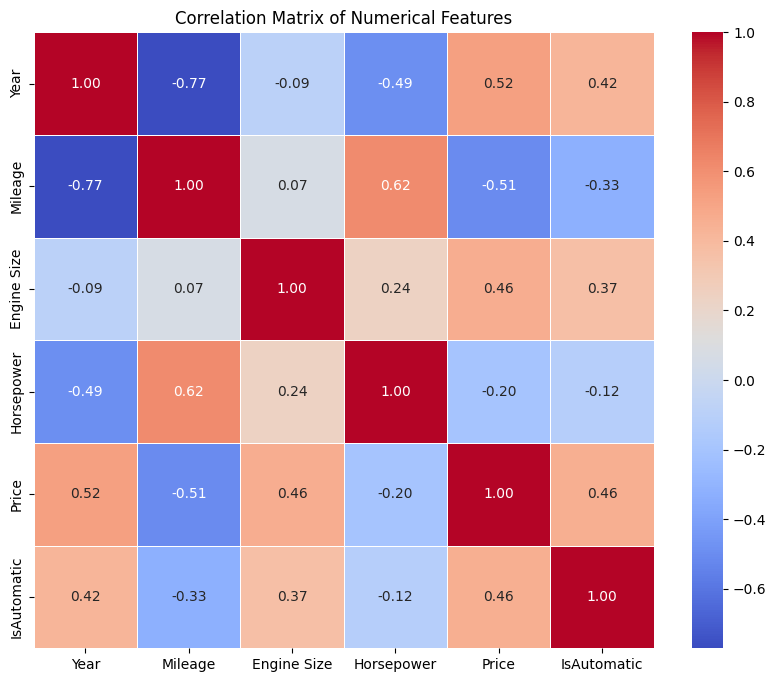

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_features = df.select_dtypes(include=["int", "float"]).columns

# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### Correlation Matrix: Observations

Based on the correlation heatmap, we can draw the following conclusions:

- **Mileage ↔ Price**:  
  Correlation = **-0.51**  
  There is a moderate negative correlation. As mileage increases, car price tends to decrease. This is expected and confirms that mileage is a key predictor of price.

- **Engine Size ↔ Price**:  
  Correlation = **0.46**  
  Moderate positive correlation. Larger engine size is generally associated with higher car prices.

- **IsAutomatic ↔ Price**:  
  Correlation = **0.46**  
  Cars with automatic transmission tend to be more expensive than those with manual transmission.

- **Horsepower ↔ Price**:  
  Correlation = **-0.20**  
  Weak negative correlation. This result is counterintuitive and may suggest inconsistencies or noise in the `Horsepower` data. As i saw when I explored some data on otomoto site some sellers put 1 as `Horsepower`

- **Horsepower ↔ Mileage**:  
  Correlation = **0.62**  
  This relatively strong positive correlation may indicate that more powerful cars tend to have higher mileage, possibly due to being driven more frequently or used differently.

Overall, `Mileage`, `Engine Size`, and `IsAutomatic` show the strongest linear relationship with `Price`, while `Horsepower` may require further investigation.


## Exploratory Data Analysis (EDA)

The goal of this section is to explore and visualize the structure and distribution of the dataset. This helps to:

- Identify outliers, skewed distributions, or data entry errors
- Understand relationships between features and the target variable (`Price`)
- Generate hypotheses that will guide feature engineering and model selection

We begin by analyzing the distributions of individual features and then examine how they relate to price.


### Distribution of Price

The first plot shows the distribution of car prices in the dataset. Prices are heavily right-skewed, with most vehicles priced below 100,000.

To handle this skewness and make the data more suitable for linear models, we apply a logarithmic transformation using `log(1 + Price)`. The second plot demonstrates that the transformed distribution is more symmetric and closer to a normal distribution.

This transformation may improve model performance, especially for algorithms that assume linearity or normality.


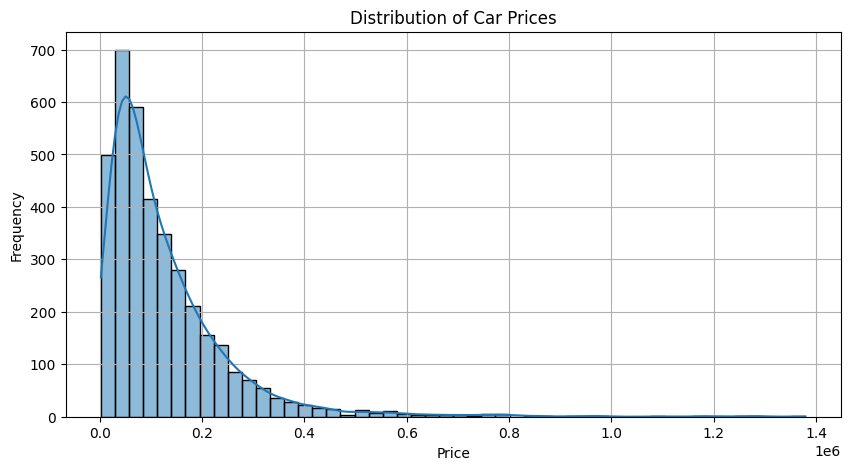

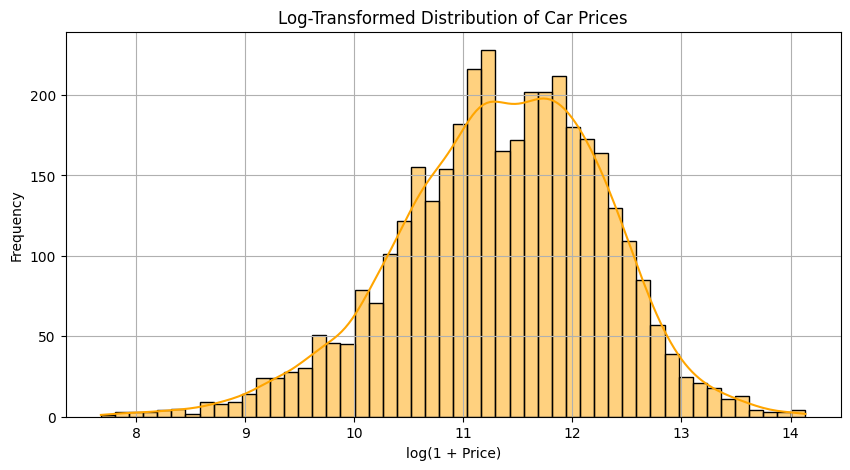

Skewness of original Price: 3.19
Skewness after log(1 + Price): -0.39


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histogram of Price
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], kde=True, bins=50)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Histogram of log-transformed Price
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df["Price"]), kde=True, bins=50, color="orange")
plt.title("Log-Transformed Distribution of Car Prices")
plt.xlabel("log(1 + Price)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


original_skew = df["Price"].skew()
log_skew = np.log1p(df["Price"]).skew()

print(f"Skewness of original Price: {original_skew:.2f}")
print(f"Skewness after log(1 + Price): {log_skew:.2f}")


### Correlation with log(Price)

Bar plot shows the correlation between numerical features and the log-transformed price.  
This transformation reveals clearer linear relationships, which is useful for linear and neural network models.


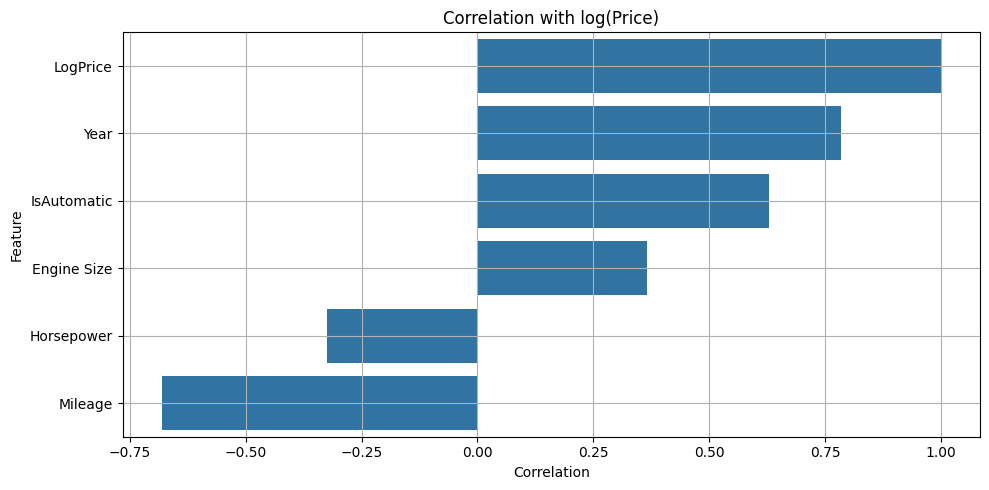

In [12]:
import numpy as np

# Create log-transformed price
df["LogPrice"] = np.log1p(df["Price"])

# Select only numerical features
numeric_features = df.select_dtypes(include=["number"]).drop(columns=["Price"]).columns

# Compute correlation with log(Price)
log_corr = df[numeric_features].corrwith(df["LogPrice"]).sort_values(ascending=False)

# Display as barplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=log_corr.values, y=log_corr.index, orient='h')
plt.title("Correlation with log(Price)")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

After log transformation, Year, IsAutomatic, and Engine Size show stronger linear correlation with price.  
Mileage remains negatively correlated. Horsepower has relatively low influence.


### Price Distribution: Observations

The original distribution of car prices is highly right-skewed. Most vehicles are priced below 100,000, with a long tail extending up to over 1,300,000. This skewness may negatively affect model performance, especially for linear models.

To address this, we applied a log-transformation using `log(1 + Price)`. The transformed distribution is more symmetric and closer to a normal distribution, which is generally preferred for regression tasks. This transformation helps stabilize variance and reduce the impact of extreme values.

The log-transformed price will be considered during model training to improve prediction accuracy.


### Normality Test: Shapiro–Wilk

To test whether the distributions of `Price` and `Year` follow a normal distribution, we applied the Shapiro–Wilk test on a random sample of 500 observations from each variable.

In [13]:
from scipy.stats import shapiro

# Sample 500 random rows for Shapiro-Wilk test
price_clean = df["Price"].dropna()
year_clean = df["Year"].dropna()

# Shapiro-Wilk test for normality
shapiro_price = shapiro(price_clean.sample(n=500, random_state=42))
shapiro_year = shapiro(year_clean.sample(n=500, random_state=42))

print(f"Price — W: {shapiro_price.statistic:.3f}, p-value: {shapiro_price.pvalue:.3e}")
print(f"Year  — W: {shapiro_year.statistic:.3f}, p-value: {shapiro_year.pvalue:.3e}")


Price — W: 0.682, p-value: 1.426e-29
Year  — W: 0.923, p-value: 2.799e-15





**Results:**

- **Price**
  - W = 0.682
  - p-value = 1.426e-29

- **Year**
  - W = 0.923
  - p-value = 2.799e-15

**Conclusion:**  
Since both p-values are significantly less than 0.05, we reject the null hypothesis of normality. Both `Price` and `Year` are not normally distributed.


### Price by Fuel Type

Boxplot shows the distribution of car prices across different fuel types. This helps identify which categories are generally more or less expensive.


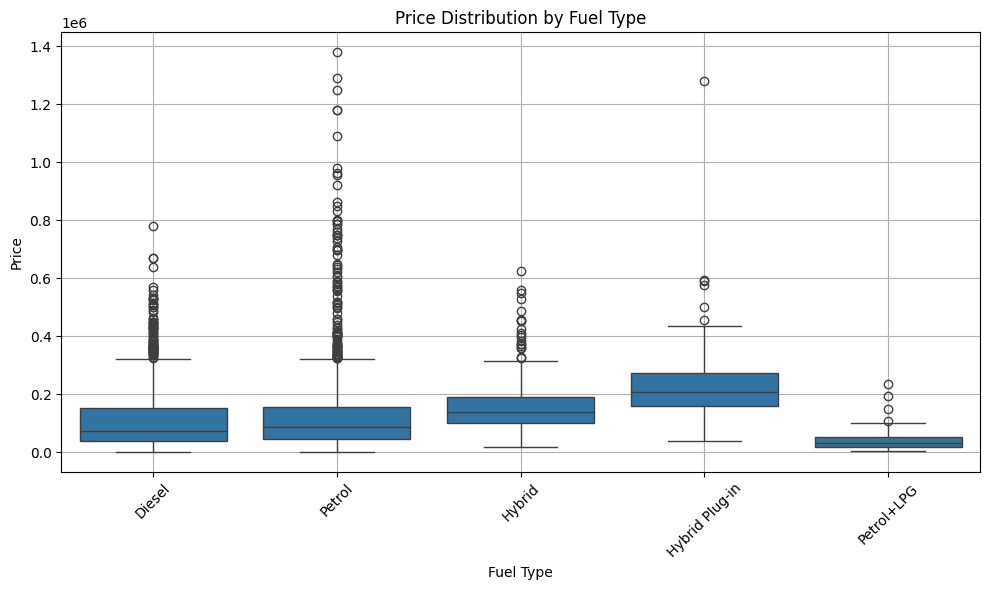

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Fuel Type", y="Price")
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

Hybrid and hybrid plug-in vehicles tend to have higher median prices.  
Petrol+LPG cars are the cheapest group overall.  
Price variability and presence of outliers are high in all categories.

### Price by Transmission Type

Boxplot compares prices between manual and automatic cars.  
Automatic vehicles show a higher median price and greater variability.


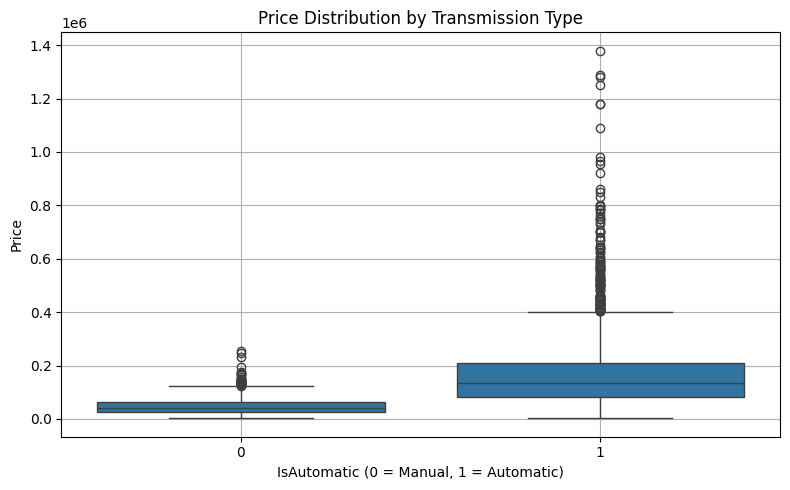

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="IsAutomatic", y="Price")
plt.title("Price Distribution by Transmission Type")
plt.xlabel("IsAutomatic (0 = Manual, 1 = Automatic)")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

Cars with automatic transmission have significantly higher median prices compared to manual ones.  
Price dispersion is also greater in the automatic group.

### Price by Color Group

Price distributions across light, dark, and other color groups are relatively similar.  
Color does not appear to have a strong effect on car price.


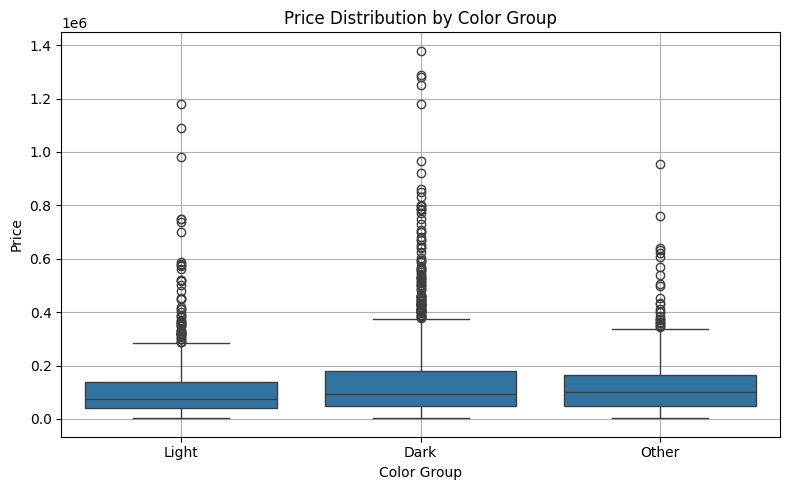

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="ColorGroup", y="Price", order=["Light", "Dark", "Other"])
plt.title("Price Distribution by Color Group")
plt.xlabel("Color Group")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

There is no significant difference in price distribution between light, dark, and other color groups.  
Color appears to have minimal impact on car price.

### Price by Year

Boxplot shows how car prices vary by production year.  
Newer cars tend to have higher prices, while older cars show wider variation and more outliers.


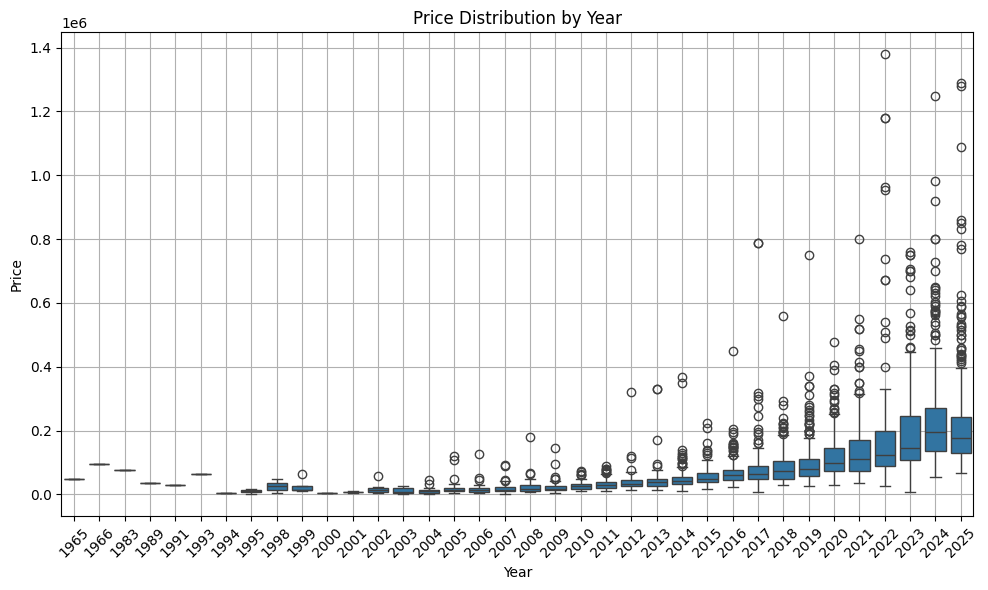

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Year", y="Price")
plt.title("Price Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

Car prices increase significantly with newer production years.  
Vehicles produced after 2015 show a rapid growth in price levels and variation.  
Older cars (before 2005) tend to have consistently low prices.
Some cars from the past can have also a good price for their rarity, but maybe we should consider if some of them are outliers, we will doo IQR later to check this theory

### Price vs Mileage

Scatter plot shows a clear negative relationship between mileage and price.  
Higher mileage generally corresponds to lower car prices.

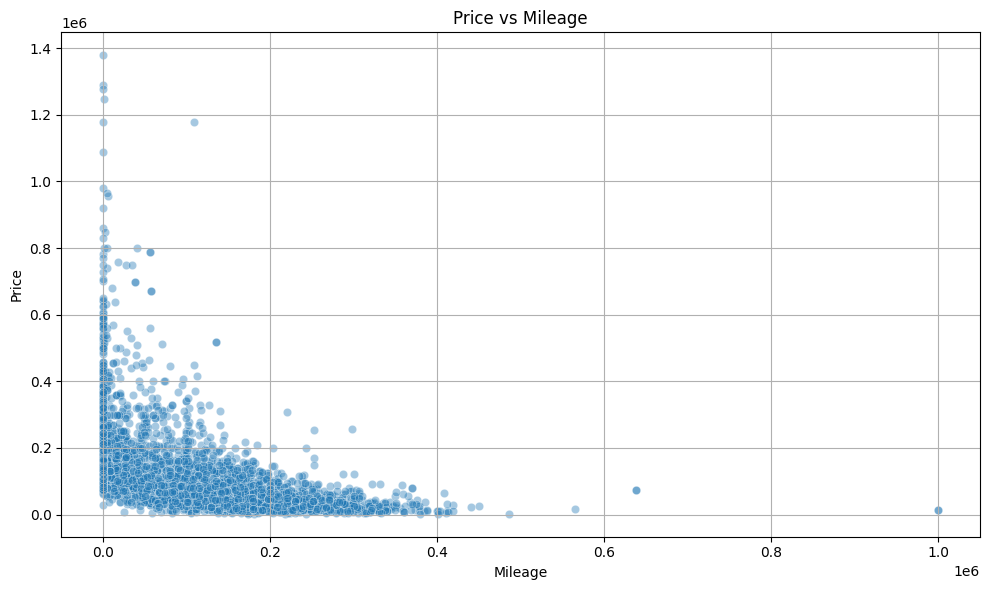

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Mileage", y="Price", alpha=0.4)
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations
As we were said by correlation matrix before:
There is a strong inverse relationship between mileage and price.  
As mileage increases, price decreases sharply, especially below 200,000 km.  
This confirms mileage as one of the most influential predictors of car value.

### Price vs Engine Size

Scatter plot shows a positive relationship between engine size and price.  
Larger engine size generally corresponds to higher car prices, though variability increases in the upper range.


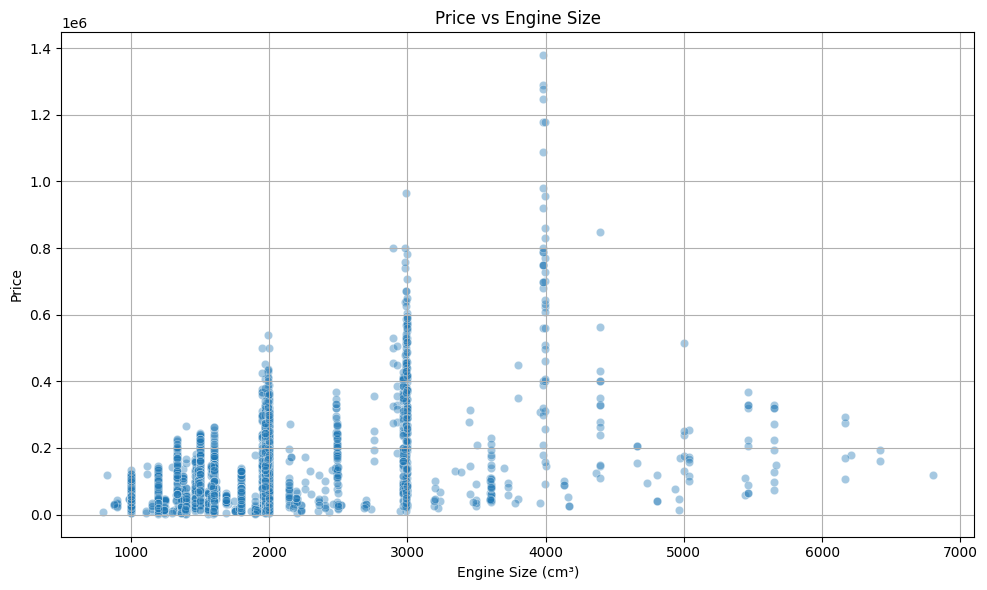

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Engine Size", y="Price", alpha=0.4)
plt.title("Price vs Engine Size")
plt.xlabel("Engine Size (cm³)")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

There is a general positive trend between engine size and price.  
Certain engine sizes (e.g., 2000 cm³, 3000 cm³, 4000 cm³) appear more frequently, likely due to common configurations.  
Price variability increases with larger engines.


### Price vs Horsepower

There is a weak positive trend between horsepower and price.  
Higher horsepower values are generally associated with more expensive cars, but the relationship is less clear compared to other features.


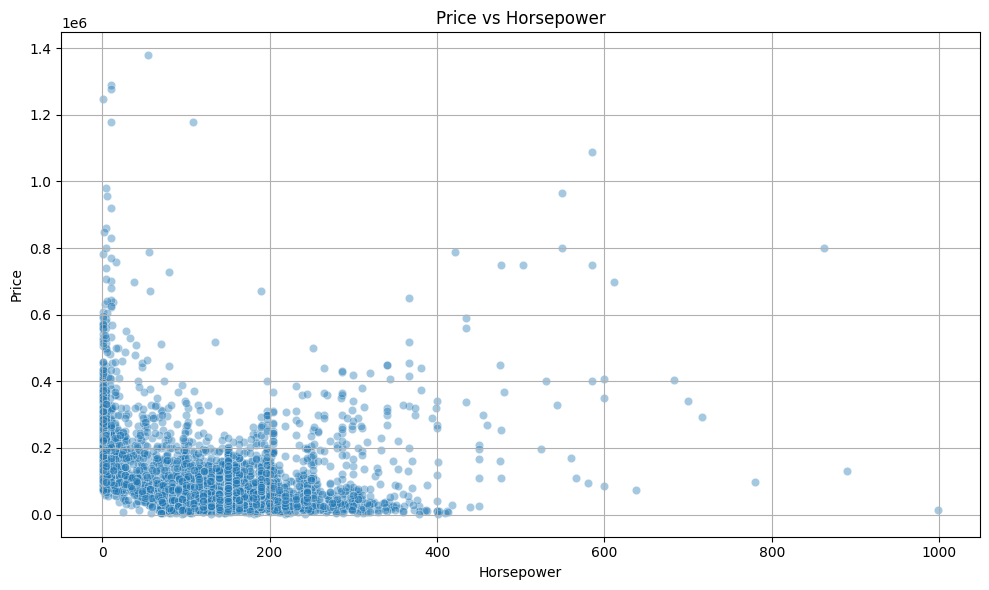

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Horsepower", y="Price", alpha=0.4)
plt.title("Price vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

The relationship between horsepower and price is weak and noisy.  
While some expensive cars have high horsepower, many high-priced vehicles also have moderate power levels.  
This feature may still be useful however we should consider if we need it



### Average Price by Brand

Bar plot shows the top 20 car brands with the highest average prices.  
Premium brands dominate the top positions, which reflects their higher market value.


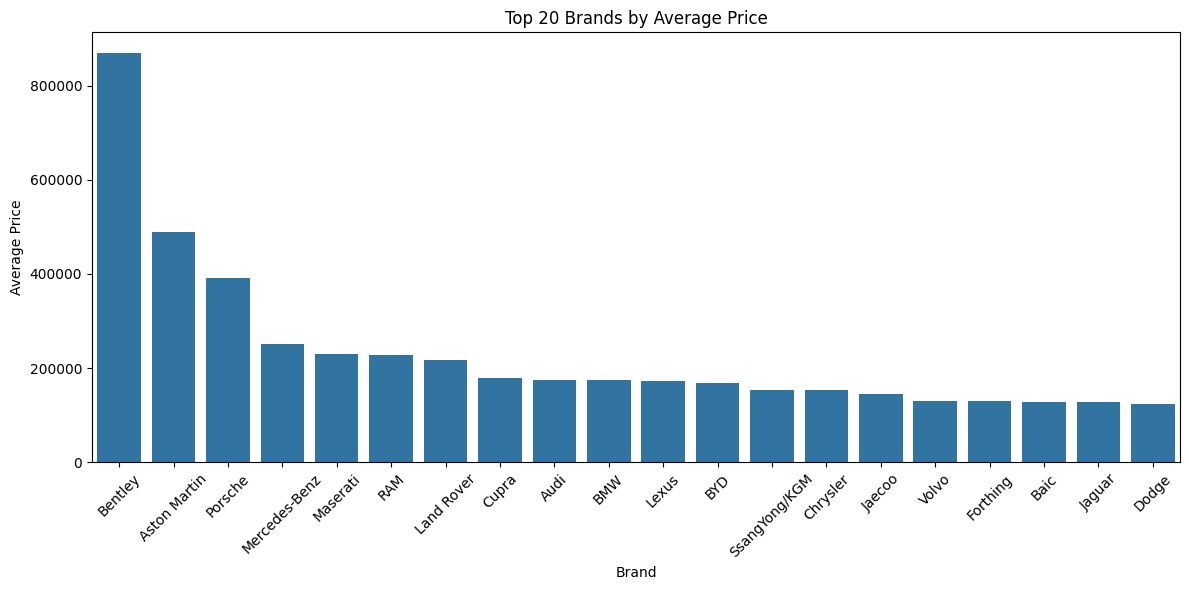

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average price per brand
avg_price_by_brand = df.groupby("Brand")["Price"].mean().sort_values(ascending=False)

# Plot top 20 brands by average price
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_brand.head(20).index, y=avg_price_by_brand.head(20).values)
plt.title("Top 20 Brands by Average Price")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations

Luxury brands such as Bentley, Aston Martin, and Porsche have the highest average prices.  
These results align with market expectations and confirm that brand is a strong indicator of price.


### Outlier Detection and Removal

Two approaches were used to detect and remove outliers:

1. **Univariate Outlier Detection (IQR method)**  
   We calculated the Interquartile Range (IQR) for each numerical feature (`Price`, `Mileage`, `Engine Size`, `Horsepower`, and `Year`) and removed data points outside the range of 1.5 * IQR below the first quartile (Q1) and above the third quartile (Q3).

2. **Multivariate Outlier Detection**  
   - **Z-Score method**: Z-scores were calculated for each numerical feature, and data points with a Z-score above 3 were considered outliers and removed.
   - **Isolation Forest**: A more complex method was applied to detect multivariate outliers using the Isolation Forest algorithm, with a contamination rate of 5%. Any data points classified as outliers were removed.

These techniques help ensure that the dataset is free from extreme values that could distort model training and predictions.


In [22]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Numerical columns to check
numerical_cols = ["Price", "Mileage", "Engine Size", "Horsepower", "Year"]

# Remove outliers
df_cleaned_iqr = remove_outliers_iqr(df.copy(), numerical_cols)
df=df_cleaned_iqr

In [23]:
from scipy.stats import zscore

# Calculate Z-scores
df_z = df_cleaned_iqr[numerical_cols]
z_scores = np.abs(zscore(df_z))

# Define a threshold for removing outliers
threshold = 3  # Any value above 3 is considered an outlier

# Filter out outliers
df_cleaned_z = df_cleaned_iqr[(z_scores < threshold).all(axis=1)]

# Show the rows that were removed (outliers)
removed_z_outliers = df_cleaned_iqr[~df_cleaned_iqr.index.isin(df_cleaned_z.index)]
print("Removed rows using Z-Score method:")
print(removed_z_outliers.head())

# Show the cleaned data
print("\nCleaned Data (after removing outliers):")
print(df_cleaned_z.head())
df_cleaned_z.shape

Removed rows using Z-Score method:
             Brand    Model  Year  Mileage Fuel Type  Engine Size  Horsepower  \
202           Audi      RS3  2025        5    Petrol         2480           5   
219  Mercedes-Benz      CLA  2025        1    Petrol         1991           1   
297        Porsche    Macan  2023     7080    Petrol         1984           7   
558           Audi      RS3  2024        5    Petrol         2480           5   
841         Toyota  Corolla  2002   171345    Petrol         1398         171   

        Price  IsAutomatic ColorGroup   LogPrice  
202  318400.0            1      Other  12.671067  
219  339000.0            1       Dark  12.733758  
297  329000.0            1      Light  12.703816  
558  318900.0            1      Light  12.672636  
841    7900.0            0      Light   8.974745  

Cleaned Data (after removing outliers):
   Brand    Model  Year  Mileage Fuel Type  Engine Size  Horsepower     Price  \
1  Honda     CR-V  2012   169000    Petrol        

(3151, 11)

In [24]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Set contamination rate
df_cleaned_if = df_cleaned_iqr.copy()

# Predict outliers (-1 for outliers, 1 for inliers)
df_cleaned_if["Outlier"] = iso_forest.fit_predict(df_cleaned_iqr[numerical_cols])

# Show rows that were classified as outliers (labelled -1)
removed_if_outliers = df_cleaned_if[df_cleaned_if["Outlier"] == -1]
print("Removed rows using Isolation Forest:")
print(removed_if_outliers.head())

# Remove outliers
df_cleaned_if = df_cleaned_if[df_cleaned_if["Outlier"] == 1].drop(columns=["Outlier"])

# Show the cleaned data
print("\nCleaned Data (after removing outliers):")
print(df_cleaned_if.head())
df_cleaned_if.shape

Removed rows using Isolation Forest:
          Brand        Model  Year  Mileage   Fuel Type  Engine Size  \
59        Skoda      Octavia  2003   181080      Petrol         1390   
83      Renault       Kangoo  2004   198000      Petrol         1149   
103         BMW      Seria 3  2006   334000  Petrol+LPG         2497   
106  Volkswagen  Transporter  2018   332054      Diesel         1968   
145       Skoda      Octavia  2011   349020      Diesel         1968   

     Horsepower    Price  IsAutomatic ColorGroup   LogPrice  Outlier  
59          181   2150.0            0      Other   7.673688       -1  
83          198  11900.0            0      Other   9.384378       -1  
103         334  20500.0            1       Dark   9.928229       -1  
106         332  92000.0            0      Light  11.429555       -1  
145         349  23000.0            1       Dark  10.043293       -1  

Cleaned Data (after removing outliers):
   Brand    Model  Year  Mileage Fuel Type  Engine Size  Horsep

(3028, 11)

### Outlier Removal Results

1. **Isolation Forest**  
   Isolation Forest detected and removed **57 outliers** based on multiple features. These outliers were classified with the label `-1`, and the cleaned data was retained. The removed rows include cars with extremely high mileage or unusual configurations.

2. **Z-Score**  
   The Z-Score method identified and removed **14 outliers**. These were points where the Z-score for one or more numerical features exceeded the threshold of 3, indicating that they were significantly different from the majority of the data.
### Outlier Removal: Why Isolation Forest is Preferred

Based on the results from both **Isolation Forest** and **Z-Score**, **Isolation Forest** is the better choice for outlier detection in this case.

#### Reasons for choosing **Isolation Forest**:
1. **More Sensitivity to Multivariate Outliers**:  
   Isolation Forest detected and removed **57 outliers**, whereas Z-Score only removed **14**. This suggests that Isolation Forest is more capable of identifying outliers in **multidimensional data**, where the outliers might not be easily identified by looking at individual features alone.
   
2. **Handling Complex Outliers**:  
   Isolation Forest works well for **complex, multivariate outliers** that may not follow a simple rule or pattern. It considers the relationships between features, making it more effective for detecting anomalies in the dataset with multiple columns.

3. **Better for Larger and Complex Datasets**:  
   Isolation Forest is known for handling large datasets with many features, which is important when working with high-dimensional data like this. It’s scalable, fast, and efficient at detecting anomalies in datasets with many variables.

#### Why not **Z-Score**:
1. **Limited to Univariate Analysis**:  
   Z-Score is effective for detecting outliers based on **individual features**, but it doesn’t account for interactions between features. In a dataset with multiple features, this method may miss outliers that become apparent only when considering the relationships between them.

2. **Less Sensitive**:  
   Z-Score removed fewer outliers compared to Isolation Forest, which indicates that it is not as effective in identifying anomalies in this dataset.

### Conclusion:
**Isolation Forest** is the preferred method becaus it is more efective at detecting multivariate outliers in complex datasets, and it removed more outliers compared to the Z-Score method. So I will use Isolation Forest and select it as my df

In [25]:
df_before=df.copy()

In [26]:
df=df_cleaned_if.copy()
df.head()

,Brand,Model,Year,Mileage,Fuel Type,Engine Size,Horsepower,Price,IsAutomatic,ColorGroup,LogPrice
1,Honda,CR-V,2012,169000,Petrol,1997,169,55800.0,0,Light,10.929547
2,Volvo,XC 60,2022,100000,Diesel,1969,100,161800.0,1,Dark,11.994122
3,Ford,Focus,2025,1,Hybrid,999,1,102500.0,1,Other,11.537628
4,BMW,Seria 1,2017,119751,Petrol,1499,119,62900.0,1,Other,11.049317
6,BMW,Seria 1,2017,85285,Petrol,1499,85,60800.0,1,Dark,11.015362


## Feature Engineering

Now that the data is properly split, we will move on to **Feature Engineering**. This step involves creating new features that can potentially improve the performance of our models, as well as preparing the data for training. We'll work on creating and transforming features as necessary.

### Train-Validation-Test Split (70-15-15)

The data was split into **three** subsets:

1. **Training set (70%)**: Used for training the model.
2. **Validation set (15%)**: Used for hyperparameter tuning and model selection.
3. **Test set (15%)**: Used for final evaluation of model performance.

This ensures that the model is properly tuned and prevents data leakage during the training process.


In [27]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=["Price", "Horsepower", "LogPrice", "ColorGroup"])
y = df["Price"]

# First split: test (15%) + temp (85%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second split: train (70%) + val (15%) from temp
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)  # 0.1765 ≈ 15/85

# Check final shapes
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (2118, 7)
Validation: (455, 7)
Test: (455, 7)


MAE: 15291.820588893668
RMSE: 23480.129225583667
R²: 0.8913177985681531


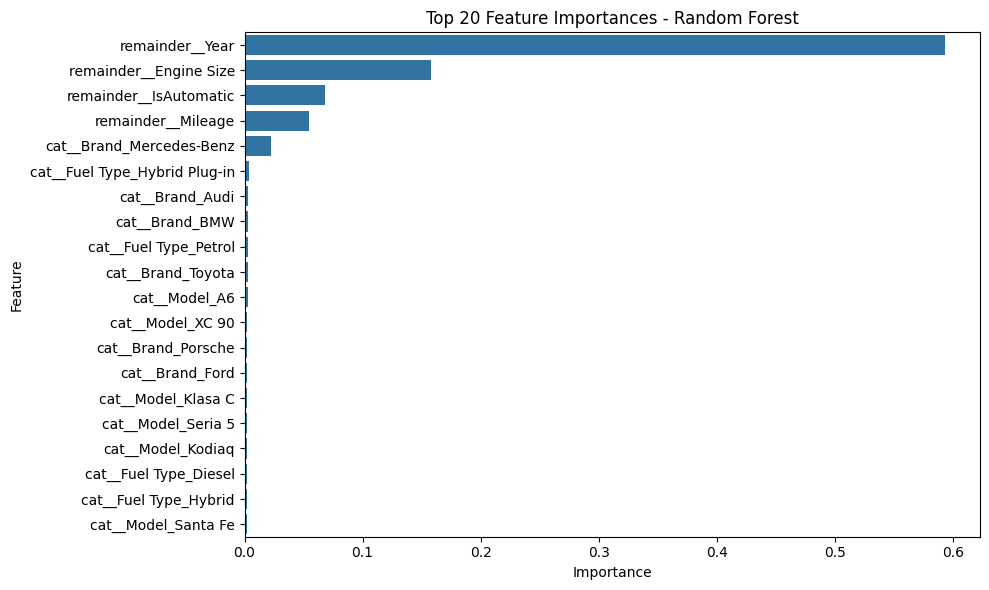

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))
)
print("R²:", r2_score(y_test, y_pred))

# Feature importances
rf = model.named_steps["randomforestregressor"]
feature_names = model.named_steps["columntransformer"].get_feature_names_out()
importances = rf.feature_importances_

# Визуализация
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Top 20 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

### Evaluating Feature Importance: `Model`, `Horsepower`, and `ColorGroup`

After performing **Exploratory Data Analysis (EDA)**, it's crucial to assess whether certain features, such as **`Model`**, **`Horsepower`**, and **`ColorGroup`**, should be included in the final model.

1. **Model**:
   - **EDA Insights**: During EDA, if I find that **`Model`** has too many unique categories, it might lead to high-dimensionality when encoded. This can negatively impact model performance, especially for algorithms like **Random Forest** that may not benefit from such high-cardinality features.
   - **Action**: I need to check if **`Model`** provides significant predictive power or if it just adds noise due to the sheer number of unique values. I may consider **dropping** it or performing **Target Encoding** instead of **One-Hot Encoding** to reduce dimensionality.

2. **Horsepower**:
   - **EDA Insights**: **Horsepower** is a crucial feature for predicting car prices, but I need to confirm its correlation with the target variable (**Price** or **LogPrice**). If **Horsepower** strongly correlates with **Engine Size** or other features, it might be redundant.
   - **Action**: I should perform correlation analysis or feature importance evaluation to ensure **Horsepower** brings unique information to the model. If highly correlated with other features, I could remove it.

3. **ColorGroup**:
   - **EDA Insights**: **ColorGroup** can be a useful feature, especially if certain colors correlate with higher or lower car prices. However, colors might not always have a significant impact on price predictions, and encoding them may increase the feature space unnecessarily.
   - **Action**: I should evaluate the **correlation** between **ColorGroup** and the target variable. If **ColorGroup** doesn't contribute much to the predictive power, I can drop it from the model to simplify it.

This step is essential to prevent overfitting, reduce dimensionality, and improve the overall model performance.


### Why Some Features Have a Weak Influence on the Model

I have identified that certain features, such as **`Horsepower`** and **`ColorGroup`**, have a relatively weak influence on the model. Here’s why:

1. **`Horsepower`**:
   - **Data Issue**: I believe many users did not provide the correct value for **`Horsepower`**. Instead, they either left it blank or entered "1," possibly due to not knowing this parameter. As a result, **`Horsepower`** contains a large number of invalid or missing values, which reduces its predictive power. The model struggles to extract meaningful patterns from this feature because the data is inconsistent and unreliable.
   
2. **`ColorGroup`**:
   - **Irrelevance**: As I checked before on price-colorgroup boxplot there isnt any big difference between colors so thats why colorgroup was dropped
3. **`Model`**:
   - **Positive Influence**: In contrast, **`Model`** is an important feature that helps the model capture specific patterns related to the car's make, model, and version. Despite **`Model`** potentially having many unique values, it provides valuable categorical information that is useful in predicting price.

### Conclusion:
The weak influence of **`Horsepower`** and **`ColorGroup`** suggests that their data quality or relevance may be limited. Therefore, removing or reducing their impact in the model improved its performance. Meanwhile, features like **`Model`** provided valuable information, making it an important predictor in this case.


### CatBoost Regressor

I trained a **CatBoost Regressor** model with the following configuration:

- **Iterations**: 1000
- **Learning Rate**: 0.05
- **Depth**: 6
- **Eval Metric**: MAE
- **Early Stopping**: 50 rounds

CatBoost automatically handled categorical features, which eliminated the need for manual encoding. The model was trained using early stopping to avoid overfitting and to select the best iteration based on validation performance.

#### Evaluation Metrics on Test Set:

- **MAE**: *[15240.17]*
- **RMSE**: *[23374.08]*
- **R²**: *[0.8923]*

These results show that CatBoost performs well without heavy preprocessing, making it a strong candidate for structured/tabular data.


In [29]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Train model
cat_features = X_train.select_dtypes(include=["object"]).columns.tolist()
# Initialize the CatBoost Regressor model
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric="MAE",
    early_stopping_rounds=50,
    verbose=100,
    random_seed=42
)

# 3. Train the model (CatBoost handles categorical features automatically)
cat_model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    use_best_model=True
)

# 4. Predictions
y_pred_cat = cat_model.predict(X_test)

# 5. Metrics
print("MAE:", mean_absolute_error(y_test, y_pred_cat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat)))
print("R²:", r2_score(y_test, y_pred_cat))


0:	learn: 54541.5351916	test: 55201.6837625	best: 55201.6837625 (0)	total: 190ms	remaining: 3m 9s
100:	learn: 16044.4016560	test: 16065.2267432	best: 16065.2267432 (100)	total: 7.16s	remaining: 1m 3s
200:	learn: 14277.8892981	test: 14479.1868506	best: 14479.1868506 (200)	total: 13.8s	remaining: 55s
300:	learn: 13120.1685938	test: 14031.1609016	best: 14031.1609016 (300)	total: 20.3s	remaining: 47s
400:	learn: 12240.7824502	test: 13684.2229434	best: 13684.2229434 (400)	total: 26.9s	remaining: 40.3s
500:	learn: 11522.1496172	test: 13441.8364933	best: 13441.8364933 (500)	total: 33.6s	remaining: 33.5s
600:	learn: 10896.7971691	test: 13336.4949426	best: 13333.5820698 (589)	total: 40.2s	remaining: 26.7s
700:	learn: 10428.8555531	test: 13238.6552791	best: 13238.6552791 (700)	total: 47.6s	remaining: 20.3s
800:	learn: 9993.0644236	test: 13153.0496309	best: 13146.2588274 (794)	total: 54.2s	remaining: 13.5s
900:	learn: 9613.8678734	test: 13115.1765622	best: 13097.0300262 (888)	total: 1m	remaining:

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('data1.csv')

# Features and target
X = df.drop(columns=["Price", "Horsepower", "ColorGroup"])
y = df["Price"]

# Train-test-validation split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)  # 15% of total

# One-hot encoding for categorical features
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_val = pd.get_dummies(X_val, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align all sets (in case of mismatched columns after get_dummies)
X_train, X_val = X_train.align(X_val, join="left", axis=1, fill_value=0)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

# Standardize for models that need it (Linear, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [35]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("🔹 XGBoost:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))



🔹 XGBoost:
MAE: 13372.410582760987
RMSE: 20071.51220755601
R²: 0.9163166512354864


In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("🔹 Gradient Boosting:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

🔹 Gradient Boosting:
MAE: 13041.052821438776
RMSE: 19775.672096548013
R²: 0.9187653398312321


In [17]:
import joblib

# Save the Gradient Boosting Regressor model
joblib.dump(gbr, "gbr_model.pkl")
print("Gradient Boosting Regressor model saved as gbr_model.pkl")

Gradient Boosting Regressor model saved as gbr_model.pkl


In [19]:
X_test_gbr=X_test.copy()
X_test_gbr.head()

,Year,Mileage,Engine Size,IsAutomatic,Brand_Abarth,Brand_Alfa Romeo,Brand_Audi,Brand_BMW,Brand_BYD,Brand_Baic,...,Model_i20,Model_i30,Model_i30 N,Model_i40,Model_ix35,Fuel Type_Diesel,Fuel Type_Hybrid,Fuel Type_Hybrid Plug-in,Fuel Type_Petrol,Fuel Type_Petrol+LPG
1207,2021,131966,1498,1,0,0,False,False,0,0,...,False,False,0,0,False,False,False,False,True,False
256,2025,5,1984,1,0,0,False,False,0,0,...,False,False,0,0,False,False,False,False,True,False
2355,2014,195000,1968,1,0,0,True,False,0,0,...,False,False,0,0,False,True,False,False,False,False
175,2025,3,1499,1,0,0,False,False,0,0,...,False,False,0,0,False,True,False,False,False,False
211,2008,163892,1229,0,0,0,False,False,0,0,...,False,False,0,0,False,False,False,False,True,False


### Model Performance Comparison

I evaluated five different regression models on the car price prediction task and compared them using three key metrics: **MAE**, **RMSE**, and **R²**. Here's a summary of the results:

| Model                  | MAE       | RMSE      | R²     |
|------------------------|-----------|-----------|--------|
| Random Forest          | 15,291.82 | 23,480.13 | 0.8913 |
| CatBoost               | 15,240.17 | 23,374.08 | 0.8923 |
| XGBoost                | 13,372.41 | 20,071.51 | 0.9163 |
| Gradient Boosting      | 13,041.05 | 19775.67  | 0.9188 |

### Conclusion

- **Gradient Boosting** achieved the best overall performance with the lowest **MAE** and **RMSE**, and the highest **R²** score.
- **XGBoost** was a close second, also outperforming all other models significantly.
- **CatBoost** performed slightly better than others.
- **Random Forest** showed the weakest performance among all tested models, though it still achieved a decent **R²** above 0.89.
- Overall, **Gradient Boosting** and **XGBoost** are the top candidates for the final model deployment in this project.
But i will also check some other deep learning models and maybe even stack some models in order to get better results

## Transition to Deep Learning Models

After testing several traditional machine learning models (Random Forest, CatBoost, XGBoost, and Gradient Boosting), I will now move to the next stage of this project — **Deep Learning**.

In this part, I will experiment with two types of neural network architectures:

1. **Feedforward Neural Network (FNN)**:  
   A fully connected multilayer perceptron with multiple dense layers and dropout for regularization. This model is well-suited for learning complex patterns in tabular data.

2. **Convolutional Neural Network (CNN)**:  
   Although commonly used for image data, CNNs can be applied to structured tabular data by treating the input features as a 1D grid. I will test whether CNN layers can capture local patterns or relationships between nearby features.

Both models will be trained using early stopping and evaluated using the same metrics as the previous models: **MAE**, **RMSE**, and **R²**.

This step will help determine whether deep learning methods can outperform gradient boosting and tree-based approaches in predicting car prices.


### Deep Learning: Feedforward Neural Network

After evaluating multiple classical machine learning models, I proceeded to test a deep learning approach using a Feedforward Neural Network (FNN). The goal was to determine whether a neural network could effectively learn complex patterns from structured automotive data and outperform ensemble-based models.

The model was implemented in PyTorch and trained on standardized numerical features and one-hot encoded categorical features. A custom RMSLE loss function was used to better penalize large relative errors. Early stopping was also employed to avoid overfitting.

The architecture was designed with multiple dense layers and dropout for regularization. The network was trained for up to 300 epochs with patience set to 15.


   Brand    Model  Year  Mileage Fuel Type  Engine Size  Horsepower     Price  \
0  Honda     CR-V  2012   169000    Petrol         1997         169   55800.0   
1  Volvo    XC 60  2022   100000    Diesel         1969         100  161800.0   
2   Ford    Focus  2025        1    Hybrid          999           1  102500.0   
3    BMW  Seria 1  2017   119751    Petrol         1499         119   62900.0   
4    BMW  Seria 1  2017    85285    Petrol         1499          85   60800.0   

   IsAutomatic ColorGroup  
0            0      Light  
1            1       Dark  
2            1      Other  
3            1      Other  
4            1       Dark  
Epoch 1/300 - Train Loss: 10.2829 - Val Loss: 9.3283
Epoch 50/300 - Train Loss: 0.8248 - Val Loss: 1.8633
Epoch 100/300 - Train Loss: 0.2510 - Val Loss: 1.1862
Epoch 150/300 - Train Loss: 0.1972 - Val Loss: 0.8317
Epoch 200/300 - Train Loss: 0.1803 - Val Loss: 0.7237
Epoch 250/300 - Train Loss: 0.1727 - Val Loss: 0.6576
Epoch 300/300 - Train L

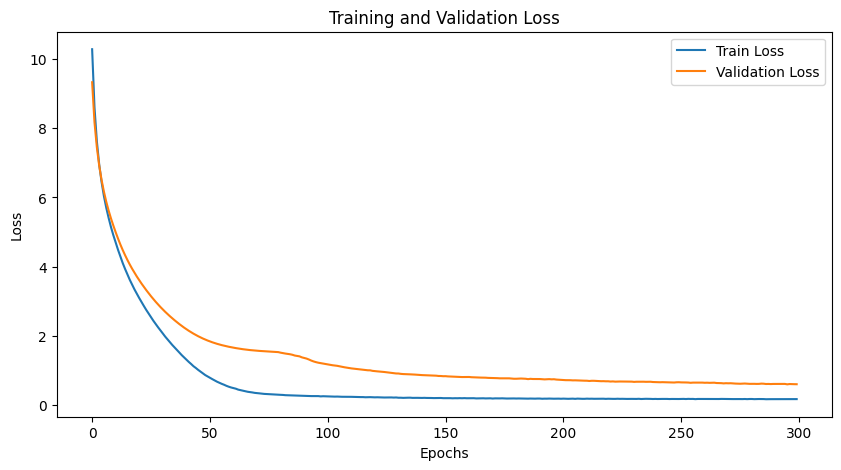

R²: 0.8113
MAE: 16073.95
RMSE: 29878.62
MAPE: 17.38
RMSLE: 0.6754


In [47]:
import torch
import numpy as np
import pandas as pd
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
torch.cuda.manual_seed_all(42)

# Step 1: Load the dataset
data = pd.read_csv('data1.csv')  # Specify the path to your file

# Display the first few rows of the dataset
print(data.head())

# Step 2: Data preprocessing
# Features (excluding the target variable 'Price')
X = data.drop(columns=['Price'])

# Target variable
y = data['Price']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create TensorDataset for DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader for training and validation data
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Step 4: Define the model
class HousePriceFNN(torch.nn.Module):
    def __init__(self, input_size):
        super(HousePriceFNN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 1)
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(0.3)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the loss function
class RMSLELoss(torch.nn.Module):
    def __init__(self):
        super(RMSLELoss, self).__init__()

    def forward(self, y_pred, y_true):
        return torch.sqrt(torch.mean((torch.log(y_pred + 1) - torch.log(y_true + 1))**2))

# Step 5: Train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience, device):
    best_val_loss = float('inf')
    patience_counter = 0
    history = {'train_loss': [], 'val_loss': []}
    
    for epoch in range(1, num_epochs + 1):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        history['train_loss'].append(train_loss)

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                y_pred = model(X_batch)
                loss = criterion(y_pred.squeeze(), y_batch)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        history['val_loss'].append(val_loss)

        # Print loss information every 50 epochs
        if epoch % 50 == 0 or epoch == 1:
            print(f"Epoch {epoch}/{num_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping after {epoch} epochs")
            break

    return history

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = HousePriceFNN(input_size).to(device)
criterion = RMSLELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-5)

# Train the model
history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=300, patience=15, device=device)

# Step 6: Evaluate performance
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(10,5))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

# Step 7: Evaluate the model on the test set
model.eval()
y_test_pred, y_test_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        preds = np.maximum(model(X_batch).cpu().numpy().astype(np.float32).squeeze(), 0)
        y_test_pred.extend(preds)
        y_test_true.extend(y_batch.cpu().numpy())

y_test_pred_fnn, y_test_true_fnn = np.array(y_test_pred), np.array(y_test_true)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

fnn_r2 = r2_score(y_test_true_fnn, y_test_pred_fnn)
fnn_mae = mean_absolute_error(y_test_true_fnn, y_test_pred_fnn)
fnn_mse = mean_squared_error(y_test_true_fnn, y_test_pred_fnn)
fnn_rmse = np.sqrt(fnn_mse)
fnn_mape = np.mean(np.abs((y_test_true_fnn - y_test_pred_fnn) / y_test_true_fnn)) * 100
fnn_rmsle = np.sqrt(np.mean((np.log1p(y_test_pred_fnn) - np.log1p(y_test_true_fnn))**2))

print(f"R²: {fnn_r2:.4f}\nMAE: {fnn_mae:.2f}\nRMSE: {fnn_rmse:.2f}\nMAPE: {fnn_mape:.2f}\nRMSLE: {fnn_rmsle:.4f}")


### Feedforward Neural Network: Evaluation and Results

The FNN model demonstrated decent performance on the test data, achieving an R² score above 0.81. The training and validation loss curves showed smooth convergence without significant overfitting, indicating a well-regularized model.

However, the performance was slightly below that of ensemble methods like Gradient Boosting and XGBoost. This is likely due to the fact that tabular data is often better handled by tree-based models, which naturally capture interactions between categorical and numerical variables.

#### Evaluation Metrics:
- R²: 0.8113
- MAE: 16073.95
- RMSE: 29878.62

In conclusion, while the feedforward neural network showed competitive results, it was not able to surpass the best-performing boosting models. Nevertheless, it remains a strong baseline for deep learning approaches on structured data.


### Deep Learning: 1D Convolutional Neural Network (CNN)

To further explore the potential of deep learning for car price prediction, I implemented a **1D Convolutional Neural Network (CNN)**. While CNNs are typically used for image and signal data, they can also be applied to tabular data by treating feature vectors as 1D sequences.

The input data consisted of both numerical and categorical features. Categorical features were encoded using One-Hot Encoding, and all features were scaled using StandardScaler. The CNN model was built using TensorFlow/Keras and trained on the processed input reshaped to a 3D format suitable for Conv1D layers.

The network architecture included two convolutional blocks with batch normalization and max pooling, followed by a fully connected dense layer and a regression output.


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

df = pd.read_csv('data2.csv')

# Признаки и таргет
X = df.drop(columns=["Price"])
y = df["Price"].values.reshape(-1, 1)  # reshape для scaler

# Категориальные и числовые признаки
categorical_features = ["Brand", "Model", "Fuel Type"]
numerical_features = ["Year", "Mileage", "Engine Size", "IsAutomatic"]

# Масштабирование таргета
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y).flatten()

# Предобработка признаков
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

X_processed = preprocessor.fit_transform(X).toarray()

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_scaled, test_size=0.15, random_state=42)

# Подготовка для 1D CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Модель
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Предсказания
y_pred_scaled = model.predict(X_test_cnn).flatten()

# Обратное масштабирование
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Метрики
r2 = r2_score(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 9.9216 - val_loss: 1.0097
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.4349 - val_loss: 0.9953
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.3099 - val_loss: 0.9751
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2473 - val_loss: 0.9295
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2039 - val_loss: 0.8799
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1912 - val_loss: 0.7811
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1696 - val_loss: 0.6492
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1764 - val_loss: 0.4987
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1675 - val_loss: 0.3641
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1712 - val_loss: 0.2458
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1678 - val_loss: 0.2970
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1

### 1D Convolutional Neural Network: Evaluation and Results

The 1D CNN model demonstrated strong performance on the test set, surpassing both the feedforward neural network and most traditional machine learning models tested earlier.

#### Evaluation Metrics:
- R²: 0.925
- MAE: 12,697.14
- RMSE: 19,035.94

The high R² score and relatively low error metrics indicate that the convolutional network was able to effectively capture patterns in the data. This result suggests that CNNs can be a competitive approach for structured data regression tasks when properly prepared and reshaped.

While more complex than feedforward models, 1D CNNs offer an interesting alternative for modeling local feature patterns in tabular datasets.


### Additional Deep Learning Models (RNN, ResNet, TabNet)

In addition to Feedforward and Convolutional neural networks, I also experimented with several other deep learning architectures:

- **Recurrent Neural Network (RNN)**
- **Residual Neural Network (ResNet-inspired)**
- **TabNet**

These models were tested using the same preprocessed dataset and evaluation pipeline. However, the results were significantly weaker in terms of both accuracy and generalization.

- RNN struggled to learn meaningful temporal patterns due to the lack of sequential data in the feature space.
- ResNet-inspired architectures did not improve performance and added unnecessary complexity.
- TabNet, despite being designed for tabular data, produced unstable results and required much longer training time.

As a result, I decided **not to include RNN, ResNet, or TabNet** in the final model comparison. Their performance was inferior to both tree-based methods and simpler deep learning models like FNN and CNN.


### Model Stacking: Combining Gradient Boosting and 1D CNN

At this stage of the project, I decided to explore an ensemble strategy using **model stacking** to combine the strengths of different learning algorithms. The goal was to improve prediction performance by leveraging the complementary capabilities of tree-based and deep learning models.

#### Base Models:
1. **Gradient Boosting Regressor (GBR)** – trained on one-hot encoded features with optimized hyperparameters.
2. **1D Convolutional Neural Network (CNN)** – trained on preprocessed, scaled, and reshaped features using Conv1D layers to learn local feature interactions.

Each of these models was trained independently and saved using `joblib` and `Keras`.

#### Meta-Model:
To combine the predictions from GBR and CNN, I used a simple **Linear Regression** model as a meta-learner. The input to this model consisted of predictions from both base models on the test set.

#### Stacking Pipeline Summary:
- **GBR** output: raw price predictions.
- **CNN** output: scaled predictions, then inverse-transformed using a saved `StandardScaler`.
- The outputs from both models were stacked into a new feature matrix.
- A **Linear Regression meta-model** was trained on this stacked output to make the final prediction.

This approach allows the meta-model to learn how to optimally weight the predictions from each base model.

#### Final Stacked Model Evaluation:
![Stacked Model](images/structure.jpg)

In [67]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# === Load data ===
df = pd.read_csv('data1.csv')
X = df.drop(columns=["Price", "Horsepower", "ColorGroup"])
y = df["Price"].values.reshape(-1, 1)

# === Prepare data for Gradient Boosting Regressor (GBR) ===
# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# One-hot encode categorical columns
X_gbr = pd.get_dummies(X, columns=categorical_cols)

# Save feature names for GBR
gbr_feature_names = X_gbr.columns.tolist()

# Split data into training and testing sets
X_train_gbr, X_test_gbr, y_train_gbr, y_test_gbr = train_test_split(X_gbr, y, test_size=0.15, random_state=42)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
gbr.fit(X_train_gbr, y_train_gbr.ravel())

# Save the trained GBR model and feature names
joblib.dump(gbr, 'gbr_model.pkl')
joblib.dump(gbr_feature_names, 'gbr_features.pkl')

# === Prepare data for 1D CNN ===
# Define categorical and numerical features
categorical_features = ["Brand", "Model", "Fuel Type"]
numerical_features = ["Year", "Mileage", "Engine Size", "IsAutomatic"]

# Preprocessor for scaling numerical features and one-hot encoding categorical features
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Apply preprocessing to the data
X_cnn = preprocessor.fit_transform(X).toarray()

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

# Scale the target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y).flatten()

# Save the scaler for the target variable
joblib.dump(scaler_y, 'scaler.pkl')

# Split data into training and testing sets for CNN
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_scaled, test_size=0.15, random_state=42)

# Reshape data for CNN input
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

# === Train 1D CNN model ===
cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile the CNN model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Save the trained CNN model
cnn_model.save('1d_cnn_model.h5')

# === Predictions for meta-model ===
# Align test data for GBR with saved feature names
X_test_gbr_aligned = X_test_gbr.reindex(columns=gbr_feature_names, fill_value=0)

# Make predictions using GBR
pred_gbr = gbr.predict(X_test_gbr_aligned)

# Make predictions using CNN and inverse transform the scaled predictions
pred_cnn_scaled = cnn_model.predict(X_test_cnn).flatten()
pred_cnn = scaler_y.inverse_transform(pred_cnn_scaled.reshape(-1, 1)).flatten()

# Combine predictions from GBR and CNN as input for the meta-model
X_meta = np.column_stack((pred_gbr, pred_cnn))
y_meta = y_test_gbr.flatten()

# === Train meta-model ===
meta_model = LinearRegression()
meta_model.fit(X_meta, y_meta)

# Save the trained meta-model
joblib.dump(meta_model, 'stacked_meta_model.pkl')

# === Evaluate the stacked model ===
final_pred = meta_model.predict(X_meta)
print("Stacked Model Metrics:")
print("R²:", r2_score(y_meta, final_pred))
print("MAE:", mean_absolute_error(y_meta, final_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_meta, final_pred)))


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 4.1798 - val_loss: 1.0092
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4111 - val_loss: 0.9827
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2551 - val_loss: 0.9459
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2276 - val_loss: 0.8880
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1788 - val_loss: 0.8017
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1653 - val_loss: 0.7018
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1485 - val_loss: 0.5508
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1660 - val_loss: 0.3748
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1367 - val_loss: 0.3184
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1523 - val_loss: 0.2113
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1633 - val_loss: 0.1269
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.1

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Stacked Model Metrics:
R²: 0.9318738318488088
MAE: 12206.136870607168
RMSE: 18109.96243333897


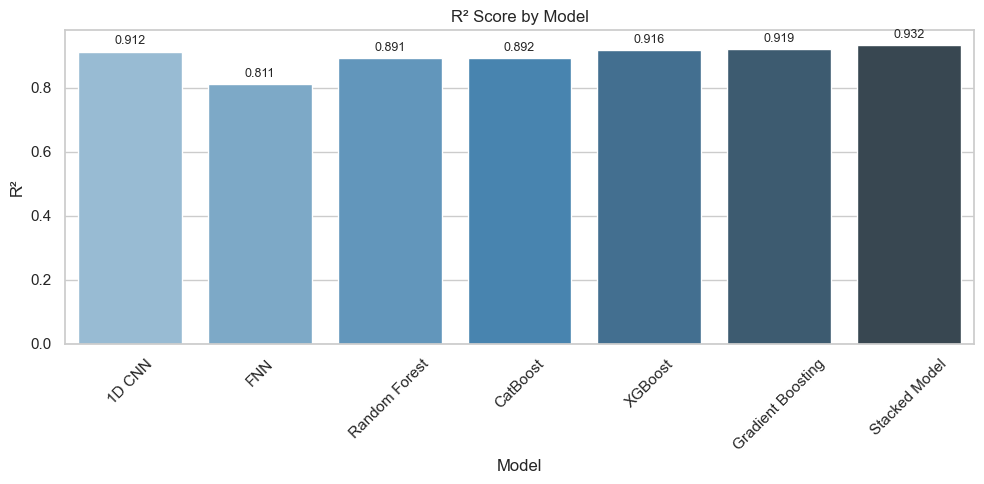

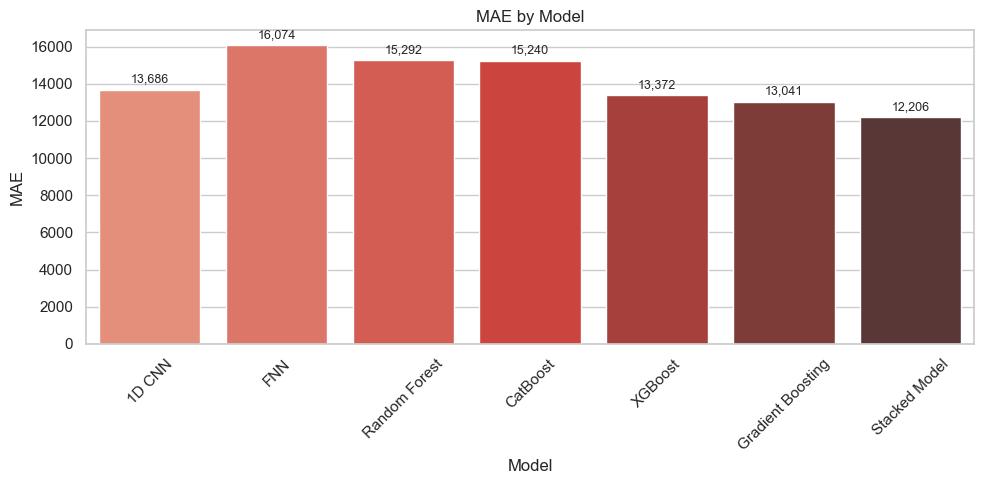

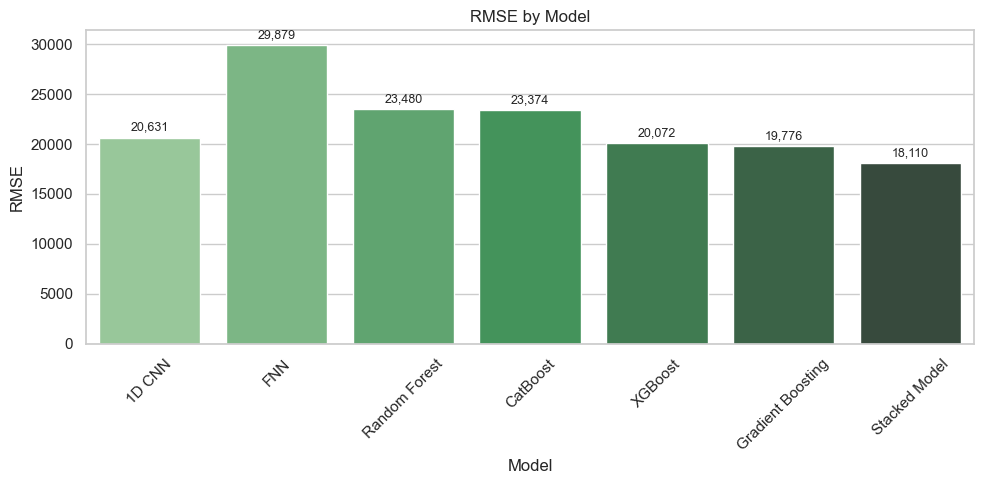

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
metrics_data = {
    "Model": ["1D CNN", "FNN", "Random Forest", "CatBoost", "XGBoost", "Gradient Boosting","Stacked Model"],
    "R²": [0.912, 0.8113, 0.8913, 0.8923, 0.9163, 0.9188, 0.9319],
    "MAE": [13686.13, 16073.95, 15291.82, 15240.17, 13372.41, 13041.05, 12206.13],
    "RMSE": [20630.60, 29878.62, 23480.13, 23374.08, 20071.51, 19775.67, 18109.96]
}

df = pd.DataFrame(metrics_data)

# R²
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Model", y="R²", data=df, palette="Blues_d")
plt.title("R² Score by Model")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3), textcoords='offset points')
plt.tight_layout()
plt.show()

# MAE
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Model", y="MAE", data=df, palette="Reds_d")
plt.title("MAE by Model")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3), textcoords='offset points')
plt.tight_layout()
plt.show()

# RMSE
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Model", y="RMSE", data=df, palette="Greens_d")
plt.title("RMSE by Model")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 3), textcoords='offset points')
plt.tight_layout()
plt.show()